In [9]:
from pathlib import Path
import rasterio
import pandas as pd
import geopandas as gpd
import numpy as np
from rasterstats import zonal_stats

BASEDIR = Path('.').resolve().parent.joinpath('datain/HTI/threshold_selection')
csv = BASEDIR.joinpath('HTI_thresholds.csv')
shp = BASEDIR.parent.parent.joinpath('shps/HTI/HTI_adm4.shp')
raster = BASEDIR.joinpath('HTI_tmp_rad.tif')
stats = zonal_stats(str(shp), raster, stats=['sum', 'mean', 'std'], geojson_out=True)
stats_geojson = gpd.GeoDataFrame.from_features(stats)
stats_geojson = stats_geojson[[f'NAME4', 'sum', 'mean', 'std']]


In [11]:
df = pd.read_csv(csv)
df = df.merge(stats_geojson, on='NAME4')

In [17]:
stats_geojson.columns = ['NAM', 'su', 'me', 'st']

In [19]:
df = pd.read_csv(csv)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,...,std0.65,sum0.7000000000000001,mean0.7000000000000001,std0.7000000000000001,sum0.75,mean0.75,std0.75,sum0.8,mean0.8,std0.8
0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,3,3,3,3,3,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,4,4,4,4,4,4,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df = pd.read_csv(csv)
sums = [x for x in df.columns.values if x.startswith('sum')]
sums.remove('sum')
#df_sum = pd.DataFrame(df[['GID','sum']])
df_final = dict()
for column in sums:
    df_corr = df[['sum', column]]
    df_corr = df_corr.corr(method='pearson')
    #print(f'Threshold: {column[3:]} --> Corr: {df_corr[column][0]}')
    d = {column: df_corr[column][0]}
    df_final[column] = [df_corr[column][0]]
    
df_sums = pd.DataFrame.from_dict(df_final)
df_sums.max(axis=1)
df_sums.idxmax(axis=1)

0    sum0.7000000000000001
dtype: object

[0]


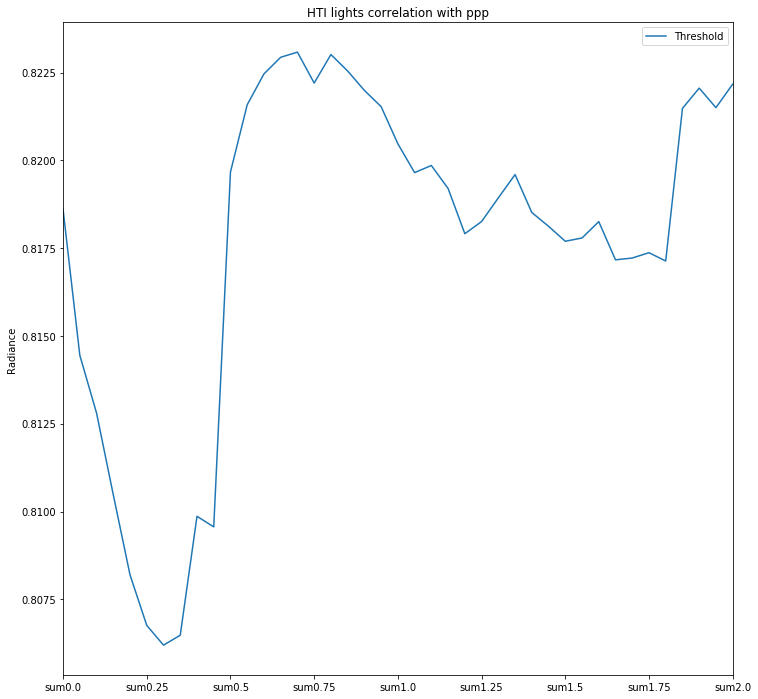

In [78]:
#import matplotlib.pyplot as plt
df_sums = df_sums.transpose()
print(df_sums.columns.values)
df_sums.columns = ['Threshold']
line = df_sums.plot.line(figsize=(12,12),title=f'HTI lights correlation with ppp')
#line.set_xlabel('Threshold')
line.set_ylabel('Radiance')
line

In [57]:
df_sums

,0
sum0.0,0.818604
sum0.05,0.814450
sum0.1,0.812804
sum0.15000000000000002,0.810475
sum0.2,0.808193
sum0.25,0.806755
sum0.30000000000000004,0.806193
sum0.35000000000000003,0.806476
sum0.4,0.809864
sum0.45,0.809562
